<a href="https://colab.research.google.com/github/nineisequaltoone/MoviePedia/blob/main/ETS_STAT_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ETS= Error / Trend / Seasonality Models **


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving airline-passengers.csv to airline-passengers.csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('airline-passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

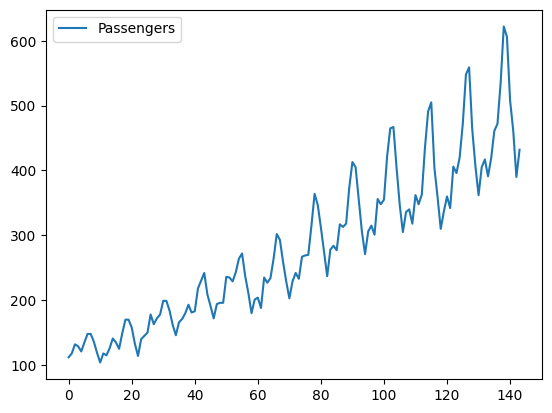

In [ ]:
df.plot()

**After Seeing the Plotting Style , We came to Know that the trend of the data little bit higher than traditional y = mx (+c)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.head(6)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df1=pd.read_csv('airline-passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
df1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

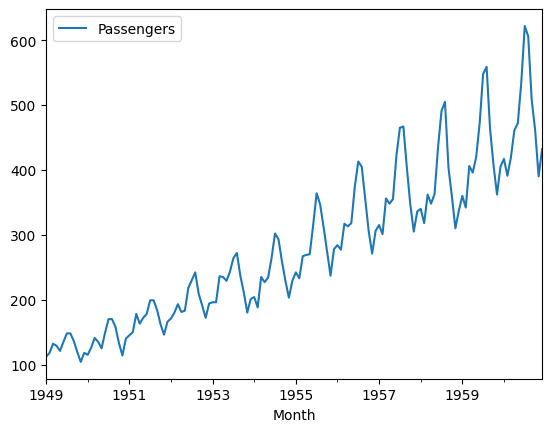

In [ ]:
df1.plot()

We have to try to find the trend of the data increasing style
1. Additive Style
2. Multiplicative Style

In [ ]:
df1.head(4)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


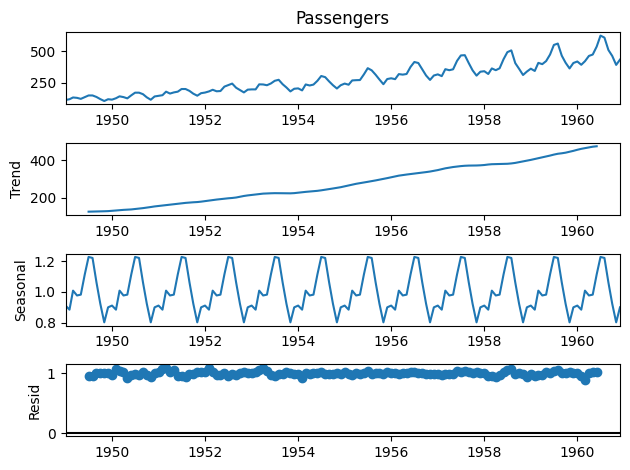

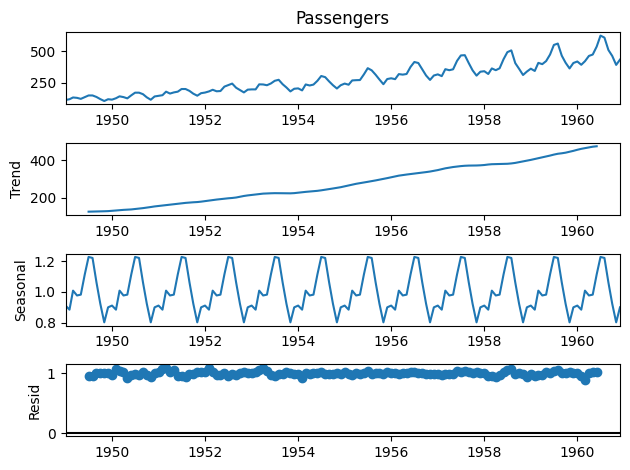

In [ ]:
result=seasonal_decompose(df1['Passengers'],model='mul')
result.plot()

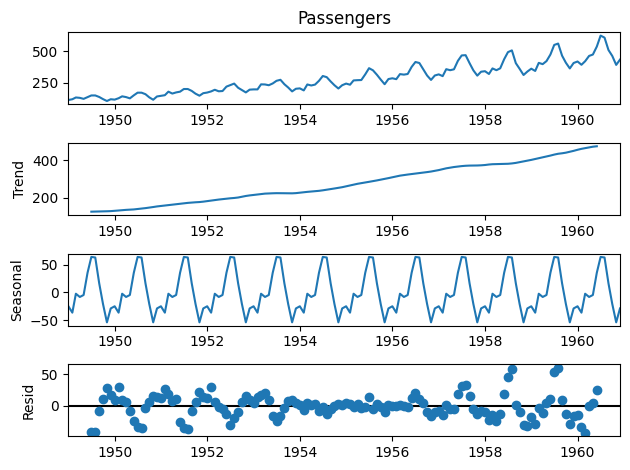

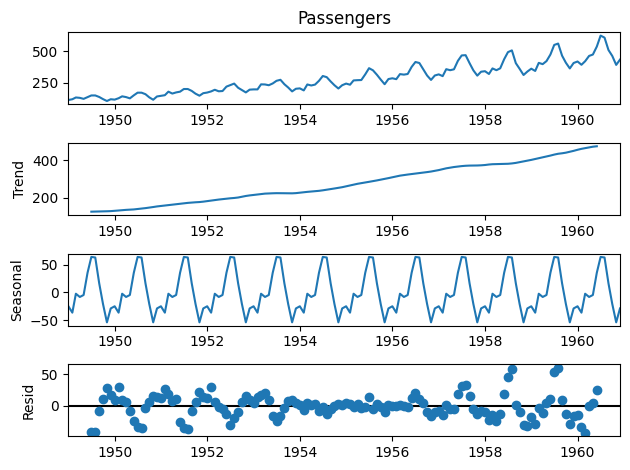

In [ ]:
result=seasonal_decompose(df1['Passengers'],model='add')
result.plot()

**After Creation of Additive Model as well as multiplicative Model - We got Two Trend Based on Two Style , May Little bit difference in Trend - but using our normal vision we cannot see the changes because it is minor.**

**For This Dataset We Cannot Find any proper trend modeling style of the data ; but still we have two more options for practice**



1.   Rolling / Average Method
2.   Exponential Average Method



In [ ]:
df1.head(6)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [ ]:
df1.tail(6)

,Passengers
Month,
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
df1['6-Month-SMA']=df1['Passengers'].rolling(window=6).mean()
df1['12-Month-SMA']=df1['Passengers'].rolling(window=12).mean()
df1['240-Month-SMA']=df1['Passengers'].rolling(window=240).mean()
df1['480-Month-SMA']=df1['Passengers'].rolling(window=480).mean()
df1['600-Month-SMA']=df1['Passengers'].rolling(window=600).mean()

<Axes: xlabel='Month'>

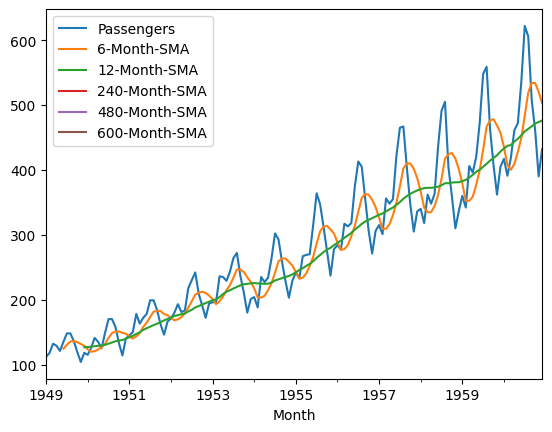

In [ ]:
df1.plot()

**After performing Simple Moving Average of the Data , Unable to Find Our Desired Result ; So at Last trying to implement Exponential Concept Instead of Traditional Mean/Median/Avg etc.**

In [ ]:
df2=pd.read_csv('airline-passengers.csv',index_col='Month',parse_dates=True)
df2

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df1.head(14)

,Passengers,6-Month-SMA,12-Month-SMA,240-Month-SMA,480-Month-SMA,600-Month-SMA
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN,NaN,NaN
1949-06-01,135,124.500000,NaN,NaN,NaN,NaN
1949-07-01,148,130.500000,NaN,NaN,NaN,NaN
1949-08-01,148,135.500000,NaN,NaN,NaN,NaN
1949-09-01,136,136.166667,NaN,NaN,NaN,NaN


In [ ]:
df['6-Month-SMA']=df['Passengers'].rolling(window=6).mean()
df['12-Month-SMA']=df['Passengers'].rolling(window=12).mean()
df['240-Month-SMA']=df['Passengers'].rolling(window=240).mean()
df['480-Month-SMA']=df['Passengers'].rolling(window=480).mean()
df['600-Month-SMA']=df['Passengers'].rolling(window=600).mean()

<Axes: >

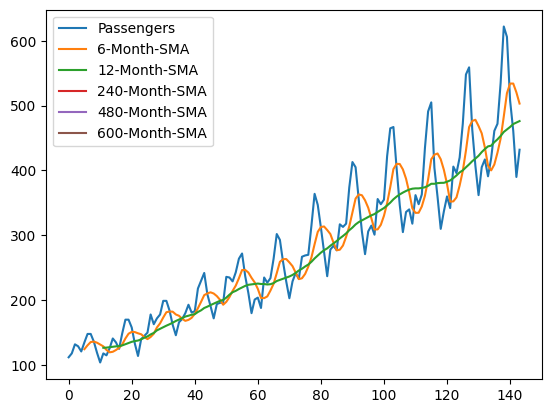

In [ ]:
df.plot()

**Prediction & Forecasting**

In [ ]:
df['EWMA12']=df['Passengers'].ewm(span=12,adjust=False).mean()
df['EWMA24']=df['Passengers'].ewm(span=24,adjust=False).mean()
df['EWMA120']=df['Passengers'].ewm(span=120,adjust=False).mean()
df['EWMA240']=df['Passengers'].ewm(span=240,adjust=False).mean()
df['EWMA480']=df['Passengers'].ewm(span=480,adjust=False).mean()
df['EWMA1200']=df['Passengers'].ewm(span=1200,adjust=False).mean()
df['EWMA2400']=df['Passengers'].ewm(span=2400,adjust=False).mean()
df['EWMA3600']=df['Passengers'].ewm(span=3600,adjust=False).mean()

<Axes: >

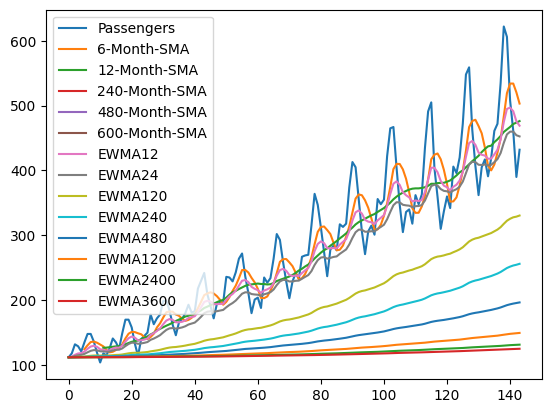

In [ ]:
df.plot()

<Axes: >

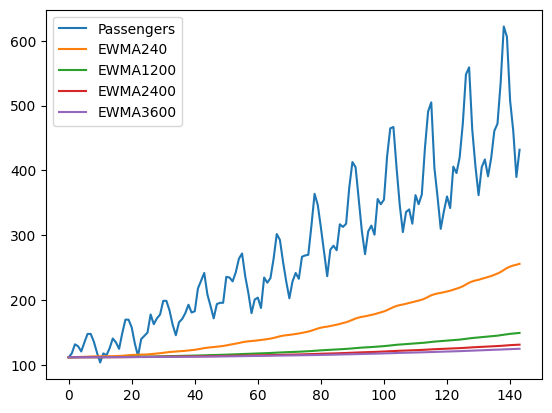

In [ ]:
df[['Passengers','EWMA240','EWMA1200','EWMA2400','EWMA3600']].plot()